In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

In [52]:
warnings.filterwarnings('ignore') 
plt.style.use('classic')

# 선형 모델과 비선형 모델 특징

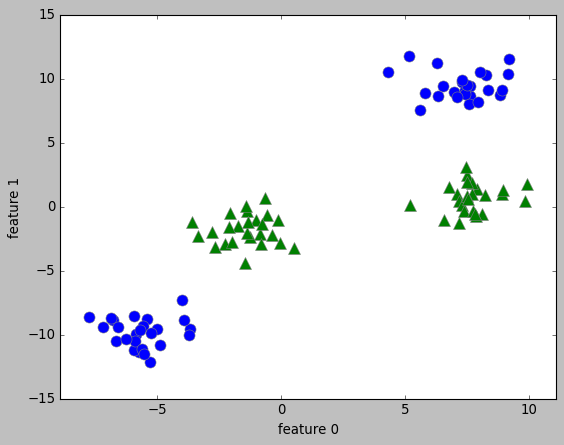

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

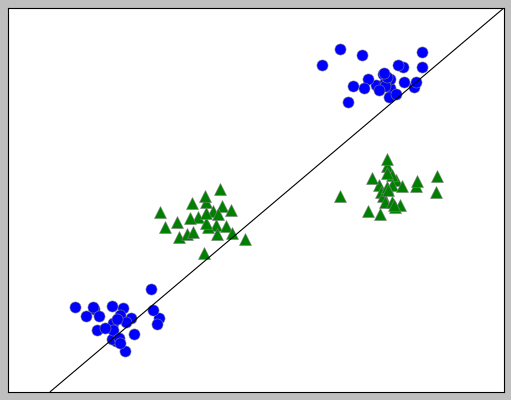

In [54]:
# 분류를 위한 선형모델은 다음과 같은 데이터에는 잘 맞지 않는다.
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter = 5000, tol = 1e-3).fit(X,y)


mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [55]:
# 두번째 특성을 제곱하여 추가한다.
X_new = np.hstack([X, X[:,1:]**2])

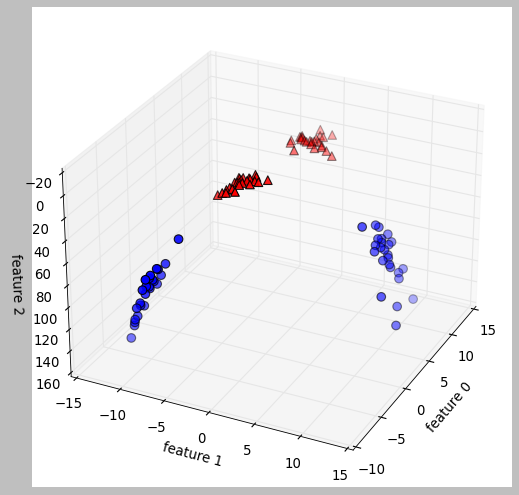

In [57]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c = 'r', s = 60, marker = '^')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")
plt.show()

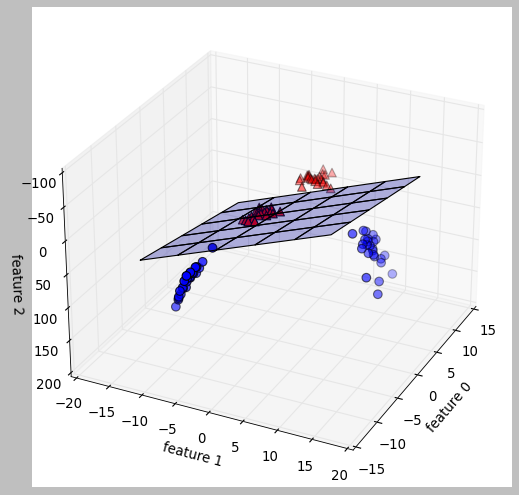

In [76]:
# 한 차원을 늘려더니 선형 분류가 잘 작동한다.

linear_svm_3d = LinearSVC(max_iter = 5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ = -(coef[0] * XX + coef[1] * YY + intercept)/coef[2]

ax.plot_surface(XX,YY,ZZ, alpha = 0.3)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c = 'r', s = 60, marker = '^')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 2")
plt.show()

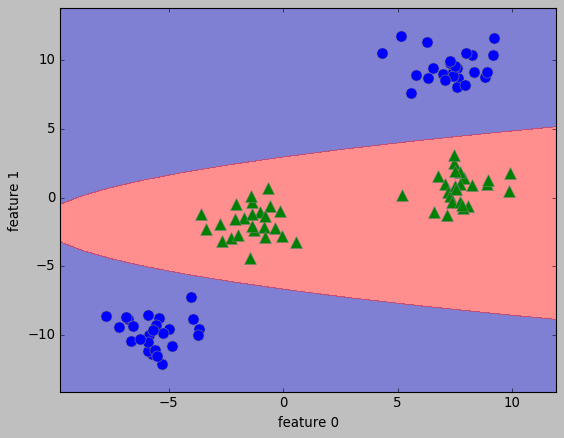

In [122]:
ZZ = YY**2
# array를 하나의 column에 대한 데이터로 보고 여러개의 array를 결합하여 준다.
dec =  linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
# 등고선을 그려주는 함수
# levels 로 구간을 2개로 나누고, 0을 기준으로 함으로써 나눈 경계가 결정 경계를 나타나게 함
plt.contourf(XX,YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()


# SVM 이해하기
### 일반적으로 훈련 데이터의 일부만 결정 경계를 결정짓는데 영향을 끼친다. 이를 서포트 벡터라 한다.

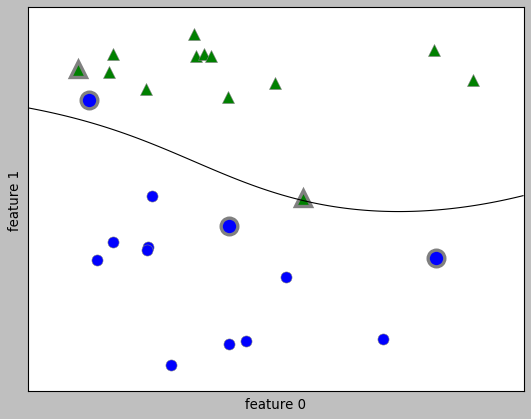

In [139]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C = 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# 서포트벡터의 데이터 값을 알려준다.
sv = svm.support_vectors_
# dual_coef_ 값의 부호에 따라 클래스가 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()


# SVM 매개변수 튜닝
## gamma : (default = 1) 높을수록 모델의 복잡도를 높임
## C : (default = 1/n_features) 높을수록 결정경계를 휘게 함.
### 복잡도가 과도하게 낮다면 C가 복잡도를 높이지만 복잡도가 과도하게 높다면 C는 복잡도를 낮춤
### 이와는 별계로 과도하게 높은 C는 복잡도를 올리기도 함

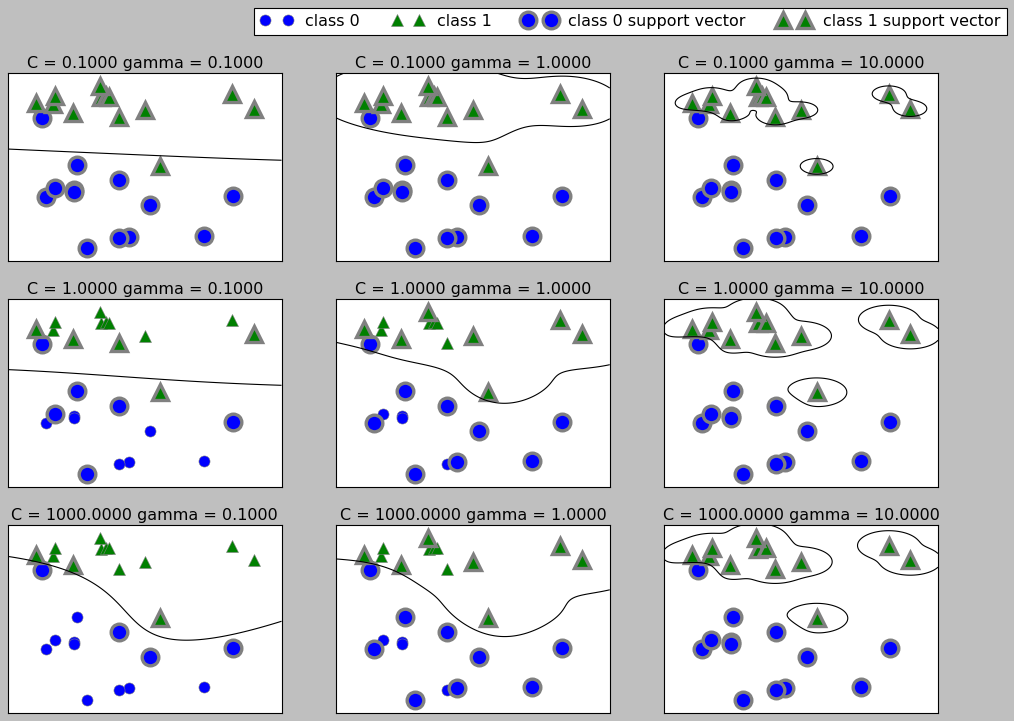

In [142]:
fig, axes = plt.subplots(3,3, figsize = (15,10))

for ax, C in zip(axes, [-1,0,3]) : 
    for a, gamma in zip(ax, range(-1,2)) :
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)
        
axes[0,0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'],
                 ncol = 4, loc = (.9, 1.2))

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print(f"train score : {svc.score(X_train , y_train):0.3f}")
print(f"test score : {svc.score(X_test, y_test):0.3f}")

train score : 0.904
test score : 0.937


Text(0, 0.5, 'features value')

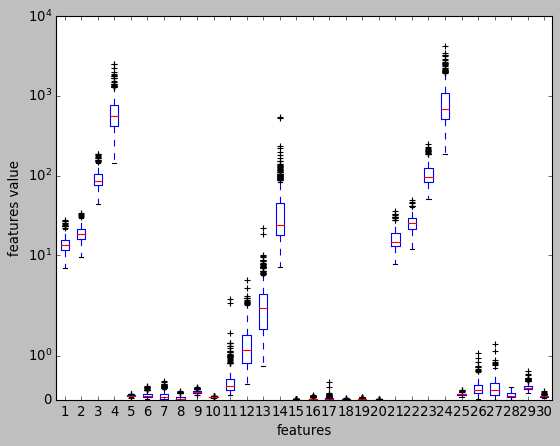

In [163]:
# SVM 은 다음과 같이 데이터 스케일 범위가 클 때 잘 작동하지 않는다.
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel("features")
plt.ylabel("features value")

# SVM을 위한 데이터 전처리

In [188]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler() 
X_train_trans = standardScaler.fit_transform(X_train)
X_test_trans = standardScaler.transform(X_test)

svc = SVC().fit(X_train_trans, y_train)

print(f"train score : {svc.score(X_train_trans, y_train):0.3f}")
print(f"test score : {svc.score(X_test_trans, y_test):0.3f}")

train score : 0.986
test score : 0.965


# SVM

## 장점
### 성능이 좋다.
### 특성이 적어도 복잡한 결정경계를 만들 수 있다.

## 단점
### 샘플이 많으면 효율성과 성능이 떨어진다.(일반적으로 100,000개 이상) 